In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gens = pd.read_csv("gens.csv")
incentive = pd.read_csv("incentive.csv")
pred = pd.read_csv("pred.csv")
real_w = pd.read_csv("weather_actual.csv")
pred_w = pd.read_csv("weather_forecast.csv")

In [3]:
incentive.describe()

,model_id,incentive,is_utilizable
count,57960.000000,57960.000000,57960.000000
mean,2.000000,26.787543,0.381643
std,1.414226,69.746116,0.485794
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,3.000000,0.000000,1.000000
max,4.000000,416.000000,1.000000


In [4]:
pred.head()

,round,time,model_id,amount
0,1,2022-06-19 01:00:00+09:00,0,0.0
1,1,2022-06-19 01:00:00+09:00,1,0.0
2,1,2022-06-19 01:00:00+09:00,2,0.0
3,1,2022-06-19 01:00:00+09:00,3,0.0
4,1,2022-06-19 01:00:00+09:00,4,0.0


# Incentive 식 구현
### C = 99

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21128\1739203997.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model0_pred = abs((pred[pred['model_id']==0][pred['round']==1].reset_index(drop=True).iloc[:100]['amount'] + pred[pred['model_id']==0][pred['round']==2].reset_index(drop=True).iloc[:100]['amount'])/2 - gens['amount'].reset_index(drop=True).iloc[:100])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21128\1739203997.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model0_pred = abs((pred[pred['model_id']==0][pred['round']==1].reset_index(drop=True).iloc[:100]['amount'] + pred[pred['model_id']==0][pred['round']==2].reset_index(drop=True).iloc[:100]['amount'])/2 - gens['amount'].reset_index(drop=True).iloc[:100])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21128\1739203997.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model0_pred.loc[(model0_pred['amount']/99*100>6) & (model

<Axes: >

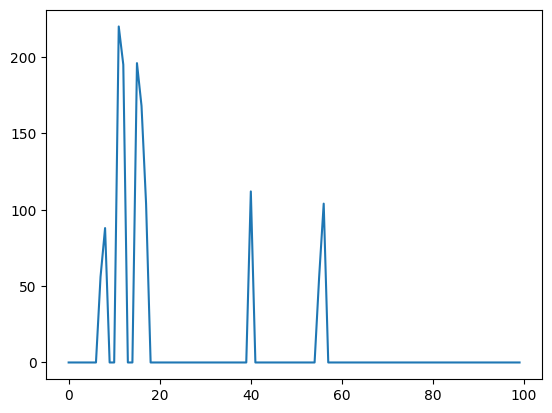

In [5]:
# incentive 직접 구하기 : 쌩 구현

# 예측 오차(| |round1 예측 + round2 예측|/2 - 실제 값 |)
model0_pred = abs((pred[pred['model_id']==0][pred['round']==1].reset_index(drop=True).iloc[:100]['amount'] + pred[pred['model_id']==0][pred['round']==2].reset_index(drop=True).iloc[:100]['amount'])/2 - gens['amount'].reset_index(drop=True).iloc[:100])
modelG = gens['amount'].reset_index(drop=True).iloc[:100]
model0_pred[incentive[incentive['model_id']==0].iloc[:100].reset_index(drop=True)['is_utilizable']==0] = 0
model0_pred = pd.DataFrame(model0_pred)
# 실제 발전량
model0_pred['real'] = 0
model0_pred['real'] = modelG
# incentive(오차/99*100 -> ~6 x4 / 6~8 x3 / 8~ 0) *실제 발전량 < 9.9이면 0
model0_pred['result'] = 0
model0_pred.loc[model0_pred['amount']/99*100<=6, 'result'] = 4*model0_pred[model0_pred['amount']/99*100<=6]['real']
model0_pred.loc[(model0_pred['amount']/99*100>6) & (model0_pred['amount']/99*100<=8), 'result'] = 3*model0_pred[model0_pred['amount']/99*100>6][model0_pred['amount']/99*100<=8]['real']
model0_pred.loc[model0_pred['real']/99*100 < 10, 'result'] = 0 
model0_pred['result'].plot()

<Axes: >

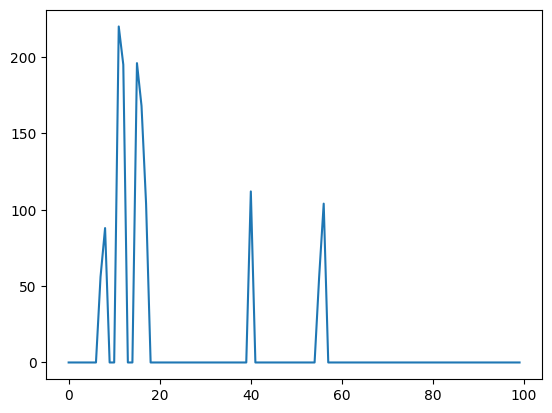

In [6]:
# 인센티브 데이터 셋 => 위와 동일한 결과 값!
incentive[incentive['model_id']==0]['incentive'].iloc[:100].reset_index(drop=True).plot()

# 결측치 처리
### {pred.csv의 round2 결측치 & weather_forecast.csv의 round2 결측치} -> 해당 일자는 전부 제거

In [7]:
model_round1_unique = (set(list(pred[pred['round']==1]['time'])) - set(list(pred[pred['round']==2]['time'])))
weather_round1_unique = (set(list(pred_w[pred_w['round']==1]['time']))-set(list(pred_w[pred_w['round']==2]['time'])))
null_time_list = list(model_round1_unique.union(weather_round1_unique))
null_time_list

['2023-08-17 06:00:00+09:00',
 '2023-10-10 16:00:00+09:00',
 '2023-10-10 20:00:00+09:00',
 '2023-08-17 16:00:00+09:00',
 '2023-10-10 22:00:00+09:00',
 '2023-10-11 00:00:00+09:00',
 '2023-08-17 05:00:00+09:00',
 '2023-10-10 05:00:00+09:00',
 '2023-08-17 17:00:00+09:00',
 '2023-08-17 08:00:00+09:00',
 '2023-08-17 07:00:00+09:00',
 '2023-08-17 14:00:00+09:00',
 '2023-10-10 17:00:00+09:00',
 '2023-10-10 19:00:00+09:00',
 '2023-08-17 20:00:00+09:00',
 '2023-08-17 18:00:00+09:00',
 '2023-10-10 06:00:00+09:00',
 '2023-10-10 01:00:00+09:00',
 '2023-10-10 23:00:00+09:00',
 '2023-08-17 15:00:00+09:00',
 '2023-10-10 11:00:00+09:00',
 '2023-10-10 18:00:00+09:00',
 '2023-10-10 07:00:00+09:00',
 '2023-08-17 13:00:00+09:00',
 '2023-08-17 04:00:00+09:00',
 '2023-10-10 10:00:00+09:00',
 '2023-08-17 09:00:00+09:00',
 '2023-08-17 23:00:00+09:00',
 '2023-08-17 01:00:00+09:00',
 '2023-10-10 08:00:00+09:00',
 '2023-08-17 21:00:00+09:00',
 '2023-08-17 10:00:00+09:00',
 '2023-10-10 15:00:00+09:00',
 '2023-08-

In [8]:
import numpy as np
for i in null_time_list:
    pred[pred['time']==i] = np.nan
    gens[gens['time']==i] = np.nan
    real_w[real_w['time']==i] = np.nan
    pred_w[pred_w['time']==i] = np.nan
pred = pred.dropna()
gens = gens.dropna()
real_w = real_w.dropna()
pred_w = pred_w.dropna()

In [9]:
# 최종 데이터
print(len(pred)/5/2, len(gens), len(real_w), len(pred_w)/2)

11568.0 11568 11568 11568.0


# 데이터 전처리 (X : weather, Y : amount)
### 모델 별 {model X값, model Y값} => round1 : pred_data1_모델idx, round2 : pred_data2_모델idx
### 실제 값 {실제 X값, 실제 Y값} => real_data

In [10]:
def time2year(x):
    temp = x.strip().split('-')
    return int(temp[0])
def time2month(x):
    temp = x.strip().split('-')
    return int(temp[1])
def time2date(x):
    temp = x.strip().split('-')
    return int(temp[2][:2])
def time2time(x):
    temp = x.strip().split(' ')
    return int(temp[1][:2])

In [11]:
pred1 = pred[pred['round']==1].reset_index(drop=True).drop(['time','round'],axis=1)
pred2 = pred[pred['round']==2].reset_index(drop=True).drop(['time','round'],axis=1)
pred_w1 = pred_w[pred_w['round']==1].reset_index(drop=True).drop(['round'],axis=1)
pred_w2 = pred_w[pred_w['round']==2].reset_index(drop=True).drop(['round'],axis=1)
pred_w1['year'] = pred_w1['time'].apply(time2year)
pred_w1['month'] = pred_w1['time'].apply(time2month)
pred_w1['date'] = pred_w1['time'].apply(time2date)
pred_w1['hour'] = pred_w1['time'].apply(time2time)
pred_w1 = pred_w1.drop(['time'],axis=1)
pred_w2['year'] = pred_w2['time'].apply(time2year)
pred_w2['month'] = pred_w2['time'].apply(time2month)
pred_w2['date'] = pred_w2['time'].apply(time2date)
pred_w2['hour'] = pred_w2['time'].apply(time2time)
pred_w2 = pred_w2.drop(['time'],axis=1)
real_w['year'] = real_w['time'].apply(time2year)
real_w['month'] = real_w['time'].apply(time2month)
real_w['date'] = real_w['time'].apply(time2date)
real_w['hour'] = real_w['time'].apply(time2time)
real_w = real_w.drop(['time'],axis=1)
for i in range(5):
    exec(f"pred_data1_{i} = pred1[pred1['model_id']==i].reset_index(drop=True).drop(['model_id'],axis=1)")
    exec(f"pred_data2_{i} = pred2[pred2['model_id']==i].reset_index(drop=True).drop(['model_id'],axis=1)")
    exec(f"pred_data1_{i} = pd.concat([pred_data1_{i}, pred_w1], axis=1).reset_index(drop=True)")
    exec(f"pred_data2_{i} = pd.concat([pred_data2_{i}, pred_w2], axis=1).reset_index(drop=True)")
real_data = pd.concat([gens.drop(['time'],axis=1), real_w], axis=1).reset_index(drop=True)

In [12]:
real_data.head()

,amount,cloud,temp,humidity,ground_press,wind_speed,wind_dir,rain,snow,dew_point,vis,uv_idx,azimuth,elevation,year,month,date,hour
0,0.0,5.871524,23.030000,91.128476,1009.000000,2.394132,152.173538,0.0,0.0,20.193333,19.193333,0.0,6.704280,-31.529640,2022,6,19,1
1,0.0,5.000000,20.046829,92.000000,1009.000000,2.490000,133.000000,0.0,0.0,20.010169,16.100000,0.0,22.196370,-28.440428,2022,6,19,2
2,0.0,31.668514,20.275571,92.000000,1008.012749,2.340765,139.974501,0.0,0.0,20.304918,16.257377,0.0,35.919394,-22.437437,2022,6,19,3
3,0.0,100.000000,20.380388,93.000000,1008.000000,2.770000,142.000000,0.0,0.0,20.403077,19.004615,0.0,47.557714,-14.221450,2022,6,19,4
4,0.0,100.000000,22.030000,93.000000,1008.000000,2.557647,133.882353,0.0,0.0,20.495385,10.143077,0.0,57.378183,-4.444699,2022,6,19,5


In [13]:
pred_data1_1.head()

,amount,cloud,temp,humidity,ground_press,wind_speed,wind_dir,rain,snow,dew_point,vis,uv_idx,azimuth,elevation,year,month,date,hour
0,0.0,6.0,20.03,93.0,1009.0,3.01,162.0,0.0,0.0,18.3333,16.0934,0.0,6.70428,-31.5296,2022,6,19,1
1,0.0,7.0,19.88,95.0,1009.0,3.16,159.0,0.0,0.0,18.3333,16.0934,0.0,22.19640,-28.4404,2022,6,19,2
2,0.0,17.0,19.99,96.0,1008.0,2.92,161.0,0.0,0.0,18.3333,16.0934,0.0,35.91940,-22.4374,2022,6,19,3
3,0.0,100.0,20.19,96.0,1008.0,2.79,157.0,0.0,0.0,17.7778,16.0934,0.0,47.55770,-14.2214,2022,6,19,4
4,0.0,100.0,20.34,95.0,1008.0,2.74,156.0,0.0,0.0,18.3333,16.0934,0.0,57.37820,-4.4447,2022,6,19,5


# Time 관련 EDA

## Hour 기준 EDA

<Axes: xlabel='hour', ylabel='amount'>

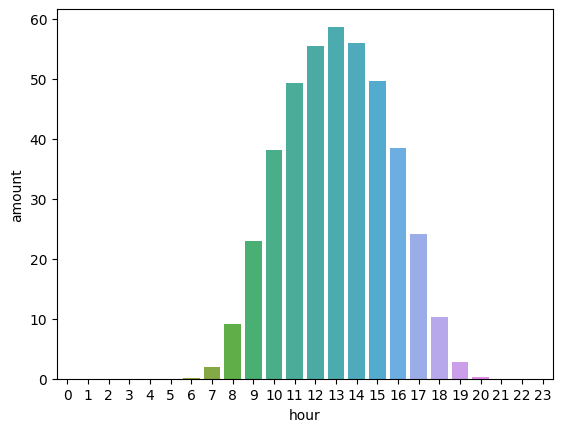

In [14]:
# 시간별 실제 평균 발전량 : 시간대가 한국 기준이 맞는 듯
sns.barplot(x=real_data.groupby('hour')['amount'].mean().index, y= real_data.groupby('hour')['amount'].mean())

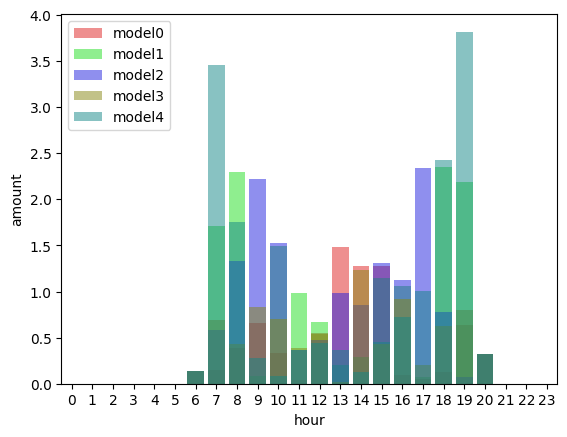

In [15]:
# 시간대별 |실제값 - 평균 예측 값|
sns.barplot(x=pred_data1_0.groupby('hour')['amount'].mean().index, y= abs(real_data.groupby('hour')['amount'].mean()-(pred_data1_0.groupby('hour')['amount'].mean()+pred_data2_0.groupby('hour')['amount'].mean())/2), color='#ff0000', alpha=0.5, label='model0')
sns.barplot(x=pred_data1_1.groupby('hour')['amount'].mean().index, y= abs(real_data.groupby('hour')['amount'].mean()-(pred_data1_1.groupby('hour')['amount'].mean()+pred_data2_1.groupby('hour')['amount'].mean())/2), color='#00ff00', alpha=0.5, label='model1')
sns.barplot(x=pred_data1_2.groupby('hour')['amount'].mean().index, y= abs(real_data.groupby('hour')['amount'].mean()-(pred_data1_2.groupby('hour')['amount'].mean()+pred_data2_2.groupby('hour')['amount'].mean())/2), color='#0000ff', alpha=0.5, label='model2')
sns.barplot(x=pred_data1_3.groupby('hour')['amount'].mean().index, y= abs(real_data.groupby('hour')['amount'].mean()-(pred_data1_3.groupby('hour')['amount'].mean()+pred_data2_3.groupby('hour')['amount'].mean())/2), color='#999900', alpha=0.5, label='model3')
sns.barplot(x=pred_data1_4.groupby('hour')['amount'].mean().index, y= abs(real_data.groupby('hour')['amount'].mean()-(pred_data1_4.groupby('hour')['amount'].mean()+pred_data2_4.groupby('hour')['amount'].mean())/2), color='#009999', alpha=0.5, label='model4')
plt.legend()

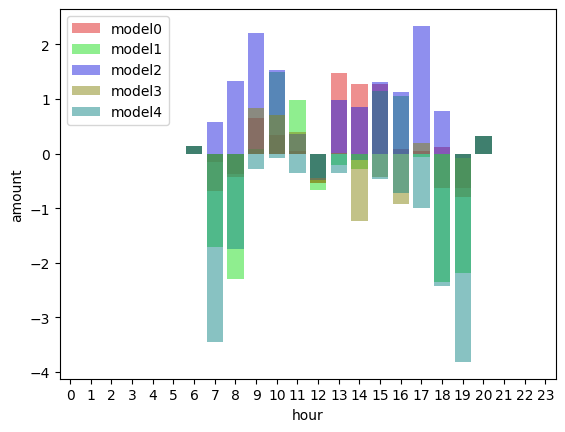

In [16]:
# 시간대별 실제값 - 평균 예측 값 : model4는 전체적으로 조금 더 낮게 예측하는 경향이 있음
sns.barplot(x=pred_data1_0.groupby('hour')['amount'].mean().index, y= (real_data.groupby('hour')['amount'].mean()-(pred_data1_0.groupby('hour')['amount'].mean()+pred_data2_0.groupby('hour')['amount'].mean())/2), color='#ff0000', alpha=0.5, label='model0')
sns.barplot(x=pred_data1_1.groupby('hour')['amount'].mean().index, y= (real_data.groupby('hour')['amount'].mean()-(pred_data1_1.groupby('hour')['amount'].mean()+pred_data2_1.groupby('hour')['amount'].mean())/2), color='#00ff00', alpha=0.5, label='model1')
sns.barplot(x=pred_data1_2.groupby('hour')['amount'].mean().index, y= (real_data.groupby('hour')['amount'].mean()-(pred_data1_2.groupby('hour')['amount'].mean()+pred_data2_2.groupby('hour')['amount'].mean())/2), color='#0000ff', alpha=0.5, label='model2')
sns.barplot(x=pred_data1_3.groupby('hour')['amount'].mean().index, y= (real_data.groupby('hour')['amount'].mean()-(pred_data1_3.groupby('hour')['amount'].mean()+pred_data2_3.groupby('hour')['amount'].mean())/2), color='#999900', alpha=0.5, label='model3')
sns.barplot(x=pred_data1_4.groupby('hour')['amount'].mean().index, y= (real_data.groupby('hour')['amount'].mean()-(pred_data1_4.groupby('hour')['amount'].mean()+pred_data2_4.groupby('hour')['amount'].mean())/2), color='#009999', alpha=0.5, label='model4')
plt.legend()

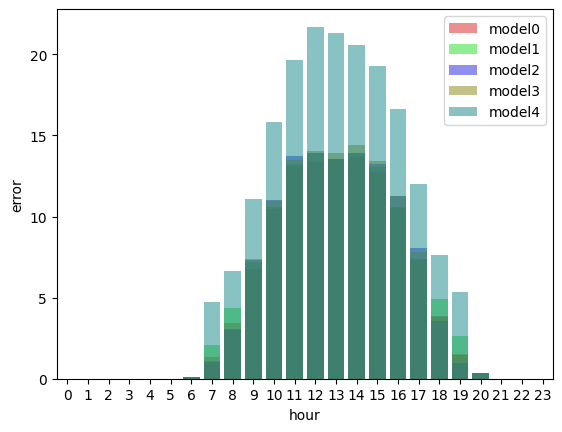

In [17]:
# 시간대별 오차 절댓값 평균 : model4 그냥 갖다 던질까?
for i in range(5):
    exec(f"pred_data1_{i}['error'] = abs(real_data['amount']-(pred_data1_{i}['amount']+pred_data2_{i}['amount'])/2)")
    exec(f"pred_data2_{i}['error'] = abs(real_data['amount']-(pred_data1_{i}['amount']+pred_data2_{i}['amount'])/2)")
sns.barplot(x=pred_data1_0.groupby('hour')['error'].mean().index, y= (pred_data1_0.groupby('hour')['error'].mean()), color='#ff0000', alpha=0.5, label='model0')
sns.barplot(x=pred_data1_1.groupby('hour')['error'].mean().index, y= (pred_data1_1.groupby('hour')['error'].mean()), color='#00ff00', alpha=0.5, label='model1')
sns.barplot(x=pred_data1_2.groupby('hour')['error'].mean().index, y= (pred_data1_2.groupby('hour')['error'].mean()), color='#0000ff', alpha=0.5, label='model2')
sns.barplot(x=pred_data1_3.groupby('hour')['error'].mean().index, y= (pred_data1_3.groupby('hour')['error'].mean()), color='#999900', alpha=0.5, label='model3')
sns.barplot(x=pred_data1_4.groupby('hour')['error'].mean().index, y= (pred_data1_4.groupby('hour')['error'].mean()), color='#009999', alpha=0.5, label='model4')
plt.legend()

## Date 기준 EDA

<Axes: xlabel='date', ylabel='amount'>

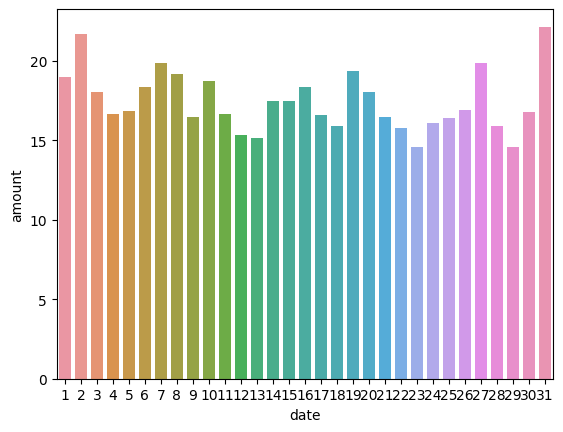

In [18]:
# Domain Shift 같은 것들은 확인하기 어려운 듯
sns.barplot(x=real_data.groupby('date')['amount'].mean().index, y= real_data.groupby('date')['amount'].mean())

## Month 기준 EDA

<Axes: xlabel='month', ylabel='amount'>

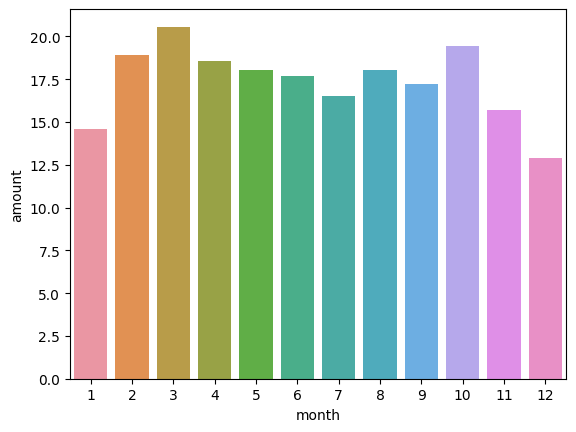

In [19]:
# ???? 여름이 왜 낮지? -> 상식과는 좀 달라...
sns.barplot(x=real_data.groupby('month')['amount'].mean().index, y= real_data.groupby('month')['amount'].mean())

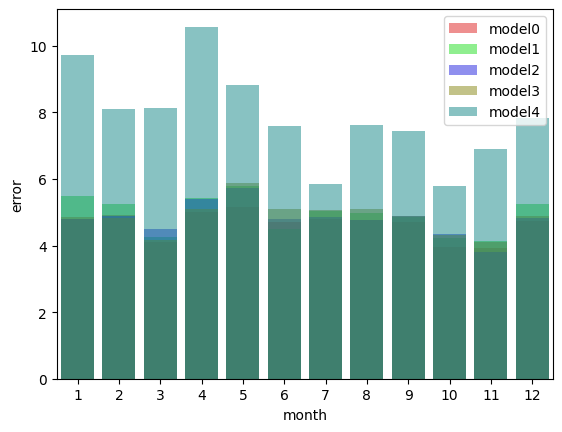

In [20]:
# 모델들이... 월의 영향도 좀 받는 것 같기도 하고...
sns.barplot(x=pred_data1_0.groupby('month')['error'].mean().index, y= (pred_data1_0.groupby('month')['error'].mean()), color='#ff0000', alpha=0.5, label='model0')
sns.barplot(x=pred_data1_1.groupby('month')['error'].mean().index, y= (pred_data1_1.groupby('month')['error'].mean()), color='#00ff00', alpha=0.5, label='model1')
sns.barplot(x=pred_data1_2.groupby('month')['error'].mean().index, y= (pred_data1_2.groupby('month')['error'].mean()), color='#0000ff', alpha=0.5, label='model2')
sns.barplot(x=pred_data1_3.groupby('month')['error'].mean().index, y= (pred_data1_3.groupby('month')['error'].mean()), color='#999900', alpha=0.5, label='model3')
sns.barplot(x=pred_data1_4.groupby('month')['error'].mean().index, y= (pred_data1_4.groupby('month')['error'].mean()), color='#009999', alpha=0.5, label='model4')
plt.legend()